In [3]:
from google.colab import files
uploaded = files.upload()

Saving student_engagement_data_10000.csv to student_engagement_data_10000.csv


In [4]:
import pandas as pd
df = pd.read_csv("student_engagement_data_10000.csv")
df.head()

,Student ID,Session ID,Date,EEG Data (PSD Features),Engagement Level,Attention Level,Internet Connectivity,Adaptivity Level,Learning Mode Prediction,Performance Metrics
0,1,183,2025-01-20,"[0.02336871035675725, 0.14892576656473, 0.4845...",High,High,High (Mobile/Wi-Fi),Moderate,Visual Learner,84
1,2,121,2025-01-20,"[0.3587673311624021, 0.8537981137219391, 0.420...",Low,High,Moderate (Wi-Fi),High,Auditory Learner,82
2,3,169,2025-01-10,"[0.7420744093003028, 0.9072353407615483, 0.122...",Moderate,High,Low (Mobile),Low,Auditory Learner,83
3,4,132,2025-01-20,"[0.5596059164442914, 0.4645215049524961, 0.062...",High,Moderate,Low (Mobile),Moderate,Visual Learner,66
4,5,190,2025-01-18,"[0.15041646487754368, 0.7331633184349893, 0.86...",High,High,High (Mobile/Wi-Fi),Moderate,Auditory Learner,93


In [5]:
# Dataset shape & sample
print("Shape:", df.shape)
df.head()

# Info & missing values
print("\n--- Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())


Shape: (10000, 10)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB
None

--- Missing Values ---
Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement

In [6]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Date column ko datetime mein convert
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check sample dates
df['date'].head()


,date
0,2025-01-20
1,2025-01-20
2,2025-01-10
3,2025-01-20
4,2025-01-18


In [7]:
print("Engagement unique values:", df['engagement_level'].unique())
print("Attention unique values:", df['attention_level'].unique())


Engagement unique values: ['High' 'Low' 'Moderate']
Attention unique values: ['High' 'Moderate' 'Low']


In [8]:
mapping = {"low": 1, "medium": 2, "high": 3}
df['engagement'] = df['engagement_level'].str.lower().map(mapping)
df['attention'] = df['attention_level'].str.lower().map(mapping)



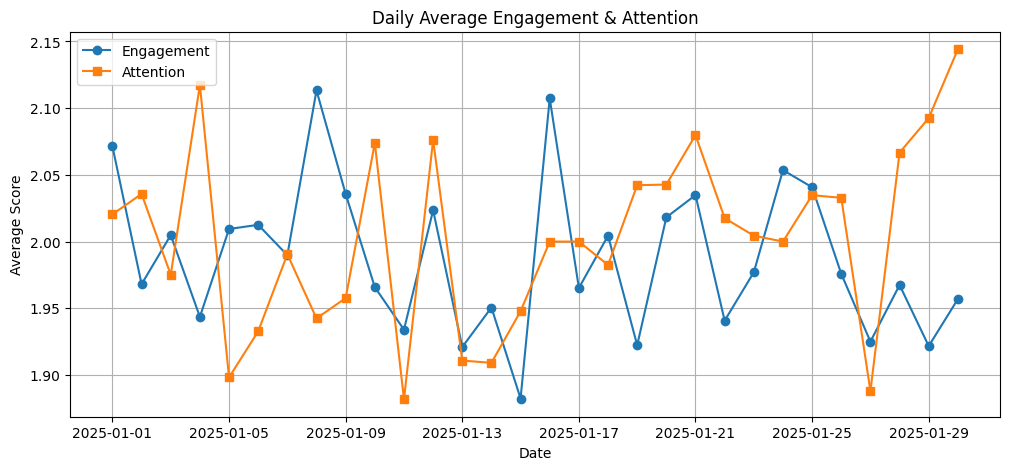

In [9]:
import matplotlib.pyplot as plt

daily_avg = df.groupby('date')[['engagement', 'attention']].mean()

plt.figure(figsize=(12,5))
plt.plot(daily_avg.index, daily_avg['engagement'], marker='o', label='Engagement')
plt.plot(daily_avg.index, daily_avg['attention'], marker='s', label='Attention')
plt.title("Daily Average Engagement & Attention")
plt.xlabel("Date")
plt.ylabel("Average Score")
plt.legend()
plt.grid(True)
plt.show()


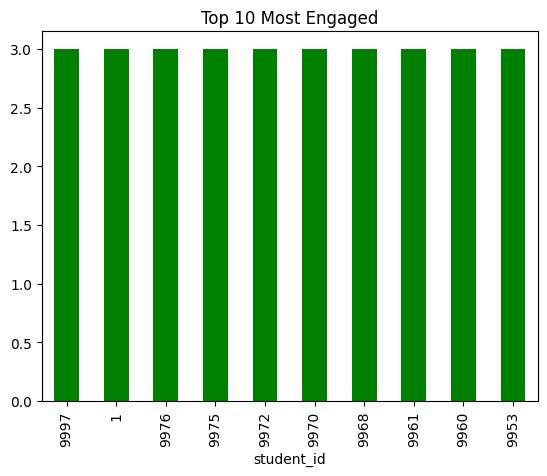

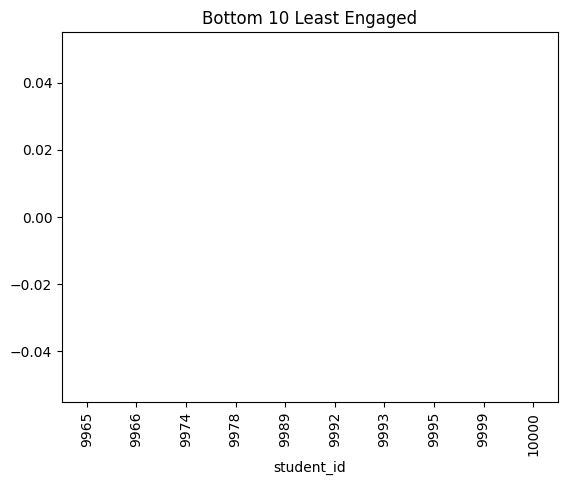

In [10]:
student_avg = df.groupby('student_id')['engagement'].mean().sort_values(ascending=False)

# Top 10
student_avg.head(10).plot(kind='bar', color='green', title='Top 10 Most Engaged')
plt.show()

# Bottom 10
student_avg.tail(10).plot(kind='bar', color='red', title='Bottom 10 Least Engaged')
plt.show()


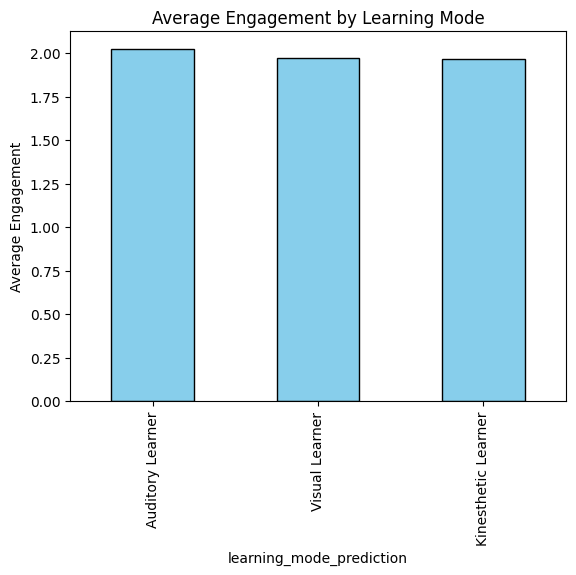

In [11]:
mode_avg = df.groupby('learning_mode_prediction')['engagement'].mean().sort_values(ascending=False)

mode_avg.plot(kind='bar', color='skyblue', edgecolor='black', title='Average Engagement by Learning Mode')
plt.ylabel("Average Engagement")
plt.show()
